# Study time of subject vs. of prerequisites: which one has a greater impact on exam performance?
## Introduction
The modeling of relative knowledge levels for students within different domains is essential for web-based adaptive learning services. Adaptive learning is a system where teaching is built around the student, adjusting itself based on the needs of students to provide an efficient learning experience. This is done through the use of AI, the AI uses different variables to decide the knowledge level of the student and helps them determine their most efficient learning schedule. **This poses the question, which of the following variables is a better predictor for the exam performance of students on the goal object, their study time of prerequisite subjects or their study time of the tested subject?** To answer this question, we will be utilizing the “User Knowledge Modeling” dataset created by Hamdi Tolga Kahraman et al. 
## Preliminary exploratory data analysis

In [1]:
library(tidyverse)
library(repr)
library(rvest)
library(readxl)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘rvest’ was built under R version 4.0.2”
Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding




#### *Reading in file*

In [4]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
path <- "user_knowledge.xls"
download.file(url, destfile = path)

user_knowledge <- read_excel(path, range = "Training_Data!A1:F259")
user_knowledge <- mutate(user_knowledge, UNS = as_factor(UNS))
head(user_knowledge, 6)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


Remarks: The data is already tidy.

#### *Summary Tables*

In [5]:
summary_table <- tibble(observations = nrow(user_knowledge), num_NA = sum(is.na(user_knowledge)))

var_names <- tibble(attribute = c("STG", "SCG", "STR", "LPR", "PEG", "UNS"),
                   description = c("The degree of study time for goal object materials (Electrical DC Machines)",
                                   "The degree of repetition number of user for goal object materials",
                                   "The degree of study time of user for prerequisites to goal object",
                                   "The exam performance of user for prerequisites to goal object",
                                   "The exam performance of user for goal objects",
                                   "Knowledge level/learning status of user"))

summary(user_knowledge)

var_names

summary_table

      STG              SCG              STR              LPR        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2407   1st Qu.:0.2100   1st Qu.:0.2913   1st Qu.:0.2500  
 Median :0.3270   Median :0.3025   Median :0.4900   Median :0.3300  
 Mean   :0.3711   Mean   :0.3557   Mean   :0.4680   Mean   :0.4327  
 3rd Qu.:0.4950   3rd Qu.:0.4975   3rd Qu.:0.6900   3rd Qu.:0.6475  
 Max.   :0.9900   Max.   :0.9000   Max.   :0.9500   Max.   :0.9900  
      PEG               UNS    
 Min.   :0.0000   very_low:24  
 1st Qu.:0.2500   High    :63  
 Median :0.5000   Low     :83  
 Mean   :0.4585   Middle  :88  
 3rd Qu.:0.6600                
 Max.   :0.9300                

attribute,description
<chr>,<chr>
STG,The degree of study time for goal object materials (Electrical DC Machines)
SCG,The degree of repetition number of user for goal object materials
STR,The degree of study time of user for prerequisites to goal object
LPR,The exam performance of user for prerequisites to goal object
PEG,The exam performance of user for goal objects
UNS,Knowledge level/learning status of user


observations,num_NA
<int>,<int>
258,0


# ` Resolved `

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



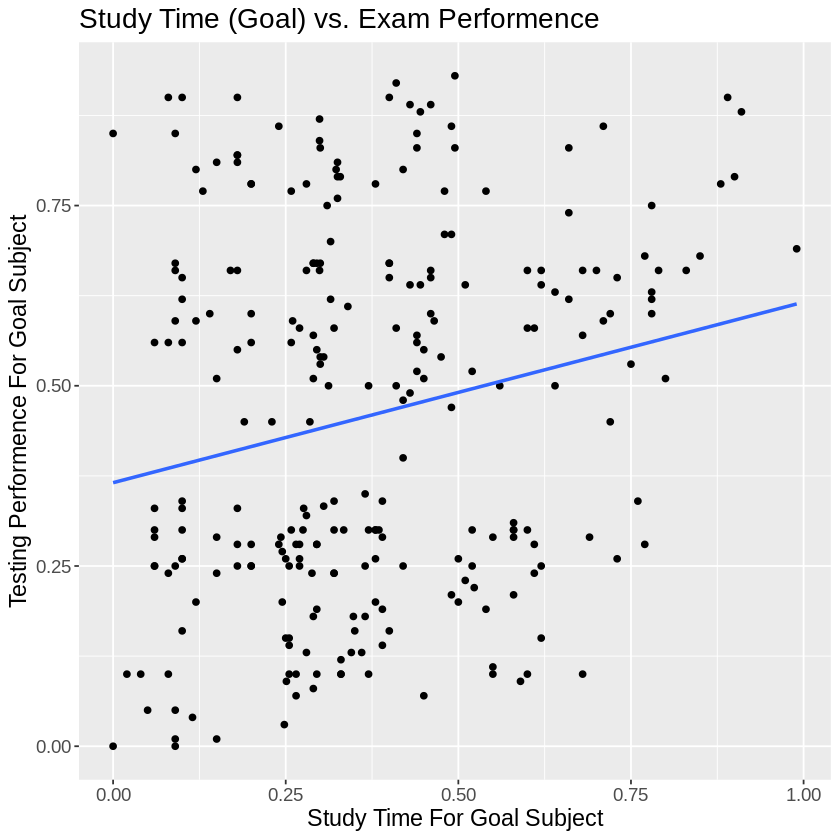

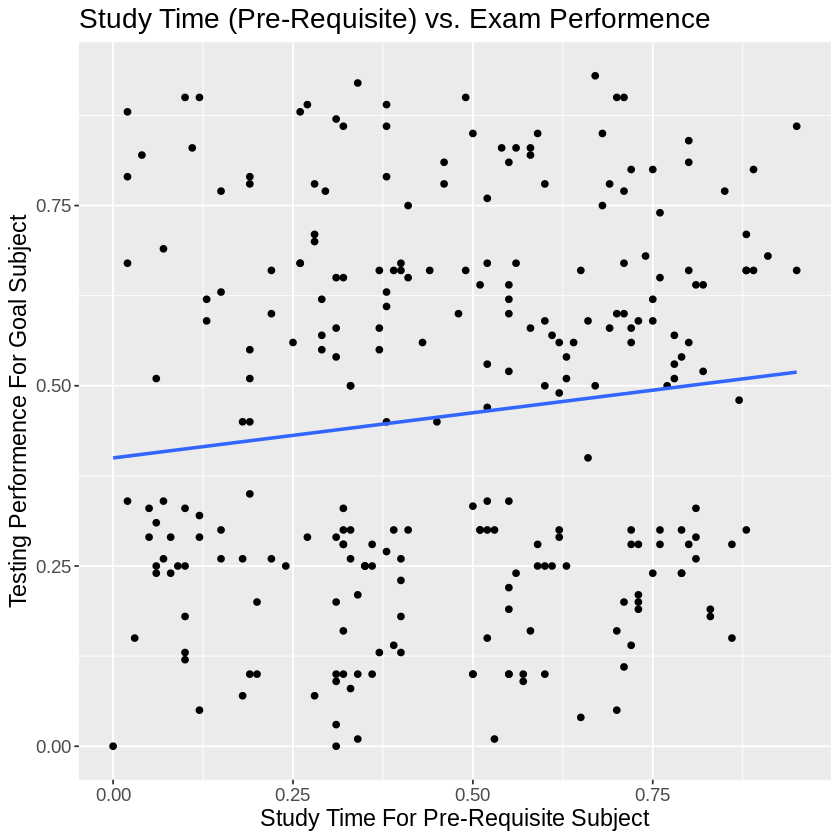

In [16]:
user_knowledge_plot_goal <- user_knowledge %>%
ggplot(aes(x = STG, y = PEG)) +
geom_point() +
labs(x = "Study Time For Goal Subject", y = "Testing Performence For Goal Subject", title = "Study Time (Goal) vs. Exam Performence") +
theme(text = element_text(size = 14)) +
geom_smooth(method=lm, se=FALSE)
user_knowledge_plot_goal

user_knowledge_plot_related <- user_knowledge %>%
ggplot(aes(x = STR, y = PEG)) +
geom_point() +
labs(x = "Study Time For Pre-Requisite Subject", y = "Testing Performence For Goal Subject", title = "Study Time (Pre-Requisite) vs. Exam Performence") +
theme(text = element_text(size = 14)) +
geom_smooth(method=lm, se=FALSE)
user_knowledge_plot_related